In [1]:
import csv 
import numpy as np 
import pandas as pd

In [2]:
ret = pd.read_csv(".\ARIMA_pred.csv")

In [3]:
ret = ret.drop(['Unnamed: 0'], axis=1)

In [4]:
ret

,600131.SH,600197.SH,600185.SH,600329.SH,600409.SH,600486.SH,600507.SH,600557.SH,600563.SH,600612.SH,600742.SH,600755.SH,600802.SH,600835.SH,600846.SH,601139.SH
0,0.014096,-0.015537,0.048295,0.006783,0.001340,-0.008864,0.033002,-0.007435,-0.037172,0.005007,-0.038415,-0.000285,0.018868,-0.008142,0.079437,-0.006710
1,0.007326,-0.009251,-0.030719,0.010588,-0.005221,-0.025326,-0.012228,-0.021262,-0.001804,0.058527,-0.020333,-0.010615,-0.026862,0.009716,-0.023895,-0.005280
2,-0.031632,-0.031627,0.002448,-0.011715,-0.005011,-0.012123,-0.010480,-0.021984,-0.009137,-0.032638,-0.020216,-0.011876,-0.006376,-0.038826,-0.022709,-0.007178
3,-0.000540,-0.000207,0.010980,-0.003233,0.000238,-0.003761,-0.000220,0.013772,0.028621,0.015232,-0.006530,0.005217,-0.006363,0.013976,0.018888,-0.005346
4,-0.035006,-0.016022,-0.022686,0.001210,-0.014064,-0.004089,0.006253,-0.034353,0.004004,-0.011577,-0.005914,-0.006410,-0.021973,-0.003196,-0.040730,-0.009119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,-0.020924,-0.100617,-0.076692,-0.013638,-0.009997,0.062481,-0.015844,-0.012000,0.020487,-0.013536,-0.023600,-0.024595,-0.009831,-0.007635,-0.014172,0.023796
492,0.007089,-0.039957,-0.082828,0.013774,0.042675,-0.003178,0.016711,-0.030565,0.047036,0.004220,-0.008438,0.018093,0.006322,-0.003343,0.009734,0.024550
493,0.012155,0.088842,-0.085665,-0.020628,-0.045745,-0.017540,-0.011849,-0.038736,0.000510,-0.009133,-0.000651,-0.011344,-0.018041,-0.048506,-0.005551,0.007882
494,-0.002735,-0.045196,0.021108,-0.017846,-0.039264,-0.004636,-0.015113,0.005165,-0.021219,0.006502,-0.025284,0.003459,0.045557,0.007547,0.002821,-0.037224


In [5]:
df = pd.read_csv(".\stock return.csv")

In [6]:
stocklist = ['600131.SH','600197.SH','600185.SH','600329.SH','600409.SH','600486.SH','600507.SH','600557.SH','600563.SH',
             '600612.SH','600742.SH','600755.SH','600802.SH','600835.SH','600846.SH','601139.SH']

df = df[stocklist]

In [7]:
df

,600131.SH,600197.SH,600185.SH,600329.SH,600409.SH,600486.SH,600507.SH,600557.SH,600563.SH,600612.SH,600742.SH,600755.SH,600802.SH,600835.SH,600846.SH,601139.SH
0,6.591174,22.431726,4.163982,19.798826,7.879522,58.457221,6.588690,12.090663,49.692038,33.155131,7.674740,6.744505,6.540581,17.251510,7.057801,5.706237
1,6.947990,21.804132,4.201327,18.869394,8.056277,57.909978,6.830315,11.764423,50.505421,33.203223,7.710570,7.006791,6.876626,17.584735,7.159819,5.763110
2,7.066928,23.015474,4.360044,19.450289,8.186517,59.571250,7.048366,12.090663,49.654206,33.309027,7.997209,7.062995,7.245455,17.822752,7.447325,5.696758
3,7.364275,23.063543,4.322699,19.663283,8.251637,58.457221,7.225165,12.110435,49.171851,33.270553,7.896885,6.997423,7.188082,17.841794,7.363856,5.696758
4,7.919321,22.486714,4.350708,19.750418,8.009762,57.597268,7.113192,12.011574,48.689496,32.529925,7.982877,6.978689,7.089727,17.613297,7.400953,5.706237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,14.020000,26.620000,7.100000,18.250000,9.290000,131.300000,6.820000,10.660000,104.080000,44.720000,9.910000,6.660000,8.020000,20.190000,8.170000,7.520000
593,14.180000,28.970000,6.500000,17.920000,8.900000,129.000000,6.750000,10.250000,104.110000,44.310000,9.900000,6.590000,7.890000,19.240000,8.130000,7.580000
594,14.160000,27.660000,6.540000,17.600000,8.550000,128.400000,6.650000,10.290000,101.890000,44.600000,9.660000,6.610000,8.210000,19.350000,8.150000,7.300000
595,14.000000,28.460000,7.180000,17.610000,9.410000,129.000000,6.990000,10.170000,108.200000,44.500000,9.670000,6.640000,8.120000,19.390000,8.180000,7.300000


In [8]:
df0 = df.copy()
for stock in df.columns[:]:
    for i in range(596):
        df0[str(stock)][i] = df[str(stock)][i+1]/df[str(stock)][i] - 1

In [9]:
df0

,600131.SH,600197.SH,600185.SH,600329.SH,600409.SH,600486.SH,600507.SH,600557.SH,600563.SH,600612.SH,600742.SH,600755.SH,600802.SH,600835.SH,600846.SH,601139.SH
0,0.054135,-0.027978,0.008969,-0.046944,0.022432,-0.009361,0.036673,-0.026983,0.016368,0.001451,0.004669,0.038889,0.051378,0.019316,0.014455,0.009967
1,0.017118,0.055556,0.037778,0.030785,0.016166,0.028687,0.031924,0.027731,-0.016854,0.003187,0.037175,0.008021,0.053635,0.013535,0.040155,-0.011513
2,0.042076,0.002089,-0.008565,0.010951,0.007955,-0.018701,0.025084,0.001635,-0.009714,-0.001155,-0.012545,-0.009284,-0.007919,0.001068,-0.011208,0.000000
3,0.075370,-0.025010,0.006479,0.004431,-0.029312,-0.014711,-0.015498,-0.008163,-0.009810,-0.022261,0.010889,-0.002677,-0.013683,-0.012807,0.005038,0.001664
4,0.048811,0.036340,0.010730,0.004902,-0.003484,-0.023074,0.020713,-0.017284,-0.018648,-0.013010,-0.005386,-0.008054,-0.010405,-0.003243,-0.015038,-0.004983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,0.011412,0.088279,-0.084507,-0.018082,-0.041981,-0.017517,-0.010264,-0.038462,0.000288,-0.009168,-0.001009,-0.010511,-0.016209,-0.047053,-0.004896,0.007979
593,-0.001410,-0.045219,0.006154,-0.017857,-0.039326,-0.004651,-0.014815,0.003902,-0.021324,0.006545,-0.024242,0.003035,0.040558,0.005717,0.002460,-0.036939
594,-0.011299,0.028923,0.097859,0.000568,0.100585,0.004673,0.051128,-0.011662,0.061930,-0.002242,0.001035,0.004539,-0.010962,0.002067,0.003681,0.000000
595,0.016429,-0.007027,-0.100279,-0.005111,0.089267,0.023256,-0.007153,0.000000,-0.006007,0.018652,0.038263,0.006024,0.004926,0.003610,0.009780,-0.008219


In [10]:
df0 = df0.drop(labels = 596,axis = 0)
prereturn = df0.reset_index(drop = True)

In [11]:
prereturn

,600131.SH,600197.SH,600185.SH,600329.SH,600409.SH,600486.SH,600507.SH,600557.SH,600563.SH,600612.SH,600742.SH,600755.SH,600802.SH,600835.SH,600846.SH,601139.SH
0,0.054135,-0.027978,0.008969,-0.046944,0.022432,-0.009361,0.036673,-0.026983,0.016368,0.001451,0.004669,0.038889,0.051378,0.019316,0.014455,0.009967
1,0.017118,0.055556,0.037778,0.030785,0.016166,0.028687,0.031924,0.027731,-0.016854,0.003187,0.037175,0.008021,0.053635,0.013535,0.040155,-0.011513
2,0.042076,0.002089,-0.008565,0.010951,0.007955,-0.018701,0.025084,0.001635,-0.009714,-0.001155,-0.012545,-0.009284,-0.007919,0.001068,-0.011208,0.000000
3,0.075370,-0.025010,0.006479,0.004431,-0.029312,-0.014711,-0.015498,-0.008163,-0.009810,-0.022261,0.010889,-0.002677,-0.013683,-0.012807,0.005038,0.001664
4,0.048811,0.036340,0.010730,0.004902,-0.003484,-0.023074,0.020713,-0.017284,-0.018648,-0.013010,-0.005386,-0.008054,-0.010405,-0.003243,-0.015038,-0.004983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,0.004298,-0.039683,-0.079118,0.011641,0.040314,-0.003037,0.014881,-0.030027,0.047082,0.004267,-0.009000,0.016794,0.005013,-0.003455,0.008642,0.024523
592,0.011412,0.088279,-0.084507,-0.018082,-0.041981,-0.017517,-0.010264,-0.038462,0.000288,-0.009168,-0.001009,-0.010511,-0.016209,-0.047053,-0.004896,0.007979
593,-0.001410,-0.045219,0.006154,-0.017857,-0.039326,-0.004651,-0.014815,0.003902,-0.021324,0.006545,-0.024242,0.003035,0.040558,0.005717,0.002460,-0.036939
594,-0.011299,0.028923,0.097859,0.000568,0.100585,0.004673,0.051128,-0.011662,0.061930,-0.002242,0.001035,0.004539,-0.010962,0.002067,0.003681,0.000000


In [12]:
df = pd.read_csv(".\stock price.csv")

In [13]:
price = df.drop(labels = range(0,1996),axis = 0)
price = price.reset_index(drop = True)
stocklist = ['600131.SH','600197.SH','600185.SH','600329.SH','600409.SH','600486.SH','600507.SH','600557.SH','600563.SH',
             '600612.SH','600742.SH','600755.SH','600802.SH','600835.SH','600846.SH','601139.SH']

price = price[stocklist]

In [14]:
price

,600131.SH,600197.SH,600185.SH,600329.SH,600409.SH,600486.SH,600507.SH,600557.SH,600563.SH,600612.SH,600742.SH,600755.SH,600802.SH,600835.SH,600846.SH,601139.SH
0,6.680378,13.238224,4.00,12.808727,5.572413,38.893303,6.235093,10.390259,36.365795,40.061247,7.445430,6.351075,6.393049,14.937980,7.159661,5.317606
1,6.492059,12.824830,4.00,12.682866,5.544504,38.404694,6.170267,10.162879,36.025309,38.839692,7.294945,6.276136,6.343872,14.385779,6.999299,5.279691
2,6.472236,12.815216,4.04,12.634458,5.544504,38.248339,6.164374,10.281512,37.094056,39.387949,7.244783,6.304238,6.302890,14.557152,7.112495,5.251254
3,6.264094,12.613326,3.96,12.644140,5.470082,38.091984,6.199733,9.955272,37.217010,38.955114,7.201787,6.266769,6.171751,14.519069,6.848371,5.203860
4,6.353297,12.680622,3.92,12.760319,5.507293,38.844442,6.134907,9.975044,38.560038,39.628413,7.337940,6.397912,6.229124,14.918938,6.895536,5.270212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,14.020000,26.620000,7.10,18.250000,9.290000,131.300000,6.820000,10.660000,104.080000,44.720000,9.910000,6.660000,8.020000,20.190000,8.170000,7.520000
492,14.180000,28.970000,6.50,17.920000,8.900000,129.000000,6.750000,10.250000,104.110000,44.310000,9.900000,6.590000,7.890000,19.240000,8.130000,7.580000
493,14.160000,27.660000,6.54,17.600000,8.550000,128.400000,6.650000,10.290000,101.890000,44.600000,9.660000,6.610000,8.210000,19.350000,8.150000,7.300000
494,14.000000,28.460000,7.18,17.610000,9.410000,129.000000,6.990000,10.170000,108.200000,44.500000,9.670000,6.640000,8.120000,19.390000,8.180000,7.300000


In [15]:
return_std = price.copy()

In [16]:
for stock in stocklist:
    for j in range(495):
        return_std[stock][j] = np.std(prereturn[stock][j+1:j+101])
return_std

,600131.SH,600197.SH,600185.SH,600329.SH,600409.SH,600486.SH,600507.SH,600557.SH,600563.SH,600612.SH,600742.SH,600755.SH,600802.SH,600835.SH,600846.SH,601139.SH
0,0.035372,0.030960,0.022893,0.026727,0.023249,0.033105,0.021197,0.022447,0.022583,0.023599,0.028062,0.019917,0.024777,0.021456,0.030906,0.020217
1,0.035443,0.030477,0.022572,0.026511,0.023166,0.032959,0.020963,0.022355,0.022550,0.023821,0.027883,0.019927,0.024184,0.021692,0.030729,0.020198
2,0.035188,0.030471,0.022582,0.026469,0.023140,0.032925,0.020797,0.022391,0.022771,0.023851,0.027864,0.019917,0.024180,0.021733,0.030751,0.020204
3,0.034484,0.030426,0.022653,0.026459,0.023017,0.032906,0.020760,0.022584,0.022767,0.023762,0.027846,0.019923,0.024228,0.021705,0.030969,0.020220
4,0.034148,0.030157,0.022643,0.026477,0.023040,0.032928,0.020663,0.022532,0.023026,0.023761,0.027909,0.020027,0.024231,0.021898,0.030942,0.020259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,0.026527,0.040469,0.031772,0.016324,0.031569,0.022580,0.021597,0.014824,0.030724,0.017760,0.025412,0.014775,0.018355,0.024381,0.016798,0.019220
492,0.026563,0.041187,0.032707,0.016322,0.031897,0.022509,0.021631,0.015176,0.030670,0.017675,0.025413,0.014761,0.018110,0.024819,0.016803,0.019204
493,0.025598,0.041357,0.032541,0.016181,0.032175,0.022471,0.021485,0.014988,0.030704,0.017699,0.023532,0.014676,0.018110,0.024771,0.016685,0.019206
494,0.025262,0.041431,0.034031,0.016081,0.033592,0.022168,0.022000,0.014220,0.031206,0.017600,0.023036,0.014670,0.018121,0.024758,0.016690,0.019204


In [25]:
import pyomo.environ as pe
n = len(stocklist)
money_ini = 100
moneylist = []
moneylist.append(money_ini)
moneyindlist = []
changelist = []

In [26]:
for t in range(495):
    cov = prereturn[stocklist][t+1:t+101].corr()
    
    # create a model
    model = pe.ConcreteModel()

    # define decision variables
    model.m = pe.Var(range(n), domain=pe.Reals)

    # declare objective
    model.obj = pe.Objective(
        expr = sum(model.m[i]*ret[stocklist[i]][t]
                   for i in range(n)), 
        sense = pe.maximize)
    
    risk_targ = sum(1/n*1/n*cov.iloc[i,j] for i in range(n) for j in range(n))
    # constraint: meet target return 
    model.ret = pe.Constraint(
        expr=sum(model.m[i]/moneylist[t]*model.m[j]/moneylist[t]*cov.iloc[i,j] for i in range(n) for j in range(n)) <= risk_targ)

    # constraint: fractions sum
    model.money = pe.Constraint(
        expr=sum(model.m[i] for i in range(n)) == moneylist[t])
    
    # constraint: short selling size
    lend = -abs(moneylist[t])*0.1
    def rule1(mod, i):
        return mod.m[i] >= lend
    model.short = pe.Constraint(range(n), rule = rule1)

    # solve the model
    solver = pe.SolverFactory('gurobi')
    solver.solve(model)
    

    moneypred = 0
    moneyreal = 0
    moneysum = 0
    moneyday = []
    
    for i in range(n):
        moneyday.append(model.m[i].value)
        moneypred = moneypred + model.m[i].value*(1+ret[stocklist[i]][t+1])
        moneyreal = moneyreal + model.m[i].value*(1+prereturn[stocklist[i]][t+100])
    if moneypred > moneylist[t]:
        moneysum = moneyreal
    else:
        moneyday = list(np.zeros(16))
        if t >= 1:
            moneysum = moneylist[t-1]
        else:
            moneysum = money_ini
    moneyindlist.append(moneyday)
    moneylist.append(moneysum)                      
    
    if t > 0:
        changeday = []
        for i in range(n):
            change = moneyindlist[t][i] - moneyindlist[t-1][i]
            changeday.append(change)
        changelist.append(changeday)
        
    print(t)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [27]:
moneylist

[100,
 100,
 100,
 100.01936739949821,
 100,
 102.16384539230083,
 100,
 101.79773586526468,
 100,
 102.01565002543377,
 100,
 102.01565002543377,
 102.86661397790635,
 103.84438040654997,
 102.86661397790635,
 103.84438040654997,
 102.86661397790635,
 103.84438040654997,
 104.94437499536248,
 103.84438040654997,
 104.94437499536248,
 103.84438040654997,
 104.94437499536248,
 106.10431490804699,
 106.91899935514498,
 106.10431490804699,
 106.91899935514498,
 108.4820685469606,
 106.91899935514498,
 107.66822772440815,
 106.91899935514498,
 107.66822772440815,
 108.4643064524103,
 109.37255571722253,
 108.4643064524103,
 109.37255571722253,
 111.69531451331716,
 109.37255571722253,
 117.11535131434762,
 123.30435933109828,
 127.49874269841943,
 135.84187961575995,
 144.12830607703896,
 153.1701314125579,
 159.69612603773223,
 168.07478919425964,
 159.69612603773223,
 162.9983367203088,
 173.00384105275396,
 175.82756697356632,
 178.33302862613394,
 180.19290949516758,
 178.3330286261339

In [20]:
import matplotlib.pyplot as plt

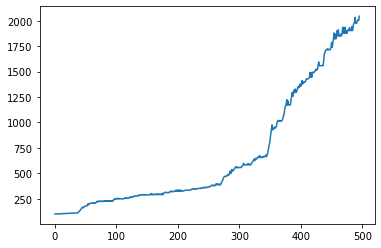

In [28]:
plt.plot(moneylist)